### Exploring the Patient Metadata

1.a) Which health conditions (including diseases, allergies, treatment history) are most prevalent in your
cohort? 

In [1]:
#package import
import os
import pandas as pd
from qiime2 import Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [27]:
# location of this week's data and all the results produced by this notebook 
# - this should be a path relative to your working directory
data_dir = 'poop_data' 
exp_dir = 'poop_data/metadata_exploring'

if not os.path.isdir(data_dir):
    os.makedirs(data_dir)
    

In [3]:
#making a dataframe out of the metadata
df_metadata = pd.read_csv(data_dir + '/metadata.tsv', sep='\t')
df_metadata.head(5)

,sampleid,GEN_age_cat,GEN_age_corrected,GEN_bmi_cat,GEN_bmi_corrected,GEN_cat,GEN_collection_timestamp,GEN_country,GEN_dog,GEN_elevation,...,HEA_lung_disease,HEA_mental_illness,HEA_migraine,HEA_seasonal_allergies,HEA_sibo,HEA_skin_condition,HEA_sleep_duration,HEA_smoking_frequency,HEA_thyroid,HEA_weight_change
0,10317.000046,20s,20.0,Normal,23.75,False,2016-08-25 18:30:00,USA,True,1919.3,...,False,False,False,True,False,False,8 or more hours,Never,False,Decreased more than 10 pounds
1,10317.000050,Not provided,NaN,Overweight,25.61,False,2016-07-06 09:00:00,United Kingdom,False,65.5,...,False,False,False,False,False,True,7-8 hours,Never,False,Remained stable
2,10317.000038,30s,39.0,Overweight,27.67,False,2016-06-29 09:30:00,United Kingdom,False,44.5,...,False,False,False,False,False,False,7-8 hours,Not provided,False,Remained stable
3,10317.000047,50s,56.0,Normal,19.71,False,2016-07-12 17:30:00,Germany,False,8.7,...,False,False,True,False,False,True,6-7 hours,Never,True,Decreased more than 10 pounds
4,10317.000046,40s,45.0,Normal,23.15,False,2016-05-24 19:00:00,United Kingdom,True,68.8,...,False,False,False,True,False,True,6-7 hours,Never,False,Remained stable


In [6]:
df_metadata.columns 
#elevation: meter above sea, add_adhd:? , GEN_dog: cats/dogs (pets), csection: how they were born,
#cancer treatment: at time of sampling she thinks, ibd: really bad.(has sthg to do with cdiff probably),  
#ibs: just weak syndrom, small intestinal bacterial overgrowth, sibo: small intestinal bacterial overgrowth
#thyroid: problems with thyroid

Index(['sampleid', 'GEN_age_cat', 'GEN_age_corrected', 'GEN_bmi_cat',
       'GEN_bmi_corrected', 'GEN_cat', 'GEN_collection_timestamp',
       'GEN_country', 'GEN_dog', 'GEN_elevation', 'GEN_geo_loc_name',
       'GEN_height_cm', 'GEN_host_common_name', 'GEN_last_move',
       'GEN_last_travel', 'GEN_latitude', 'GEN_level_of_education',
       'GEN_longitude', 'GEN_race', 'GEN_sample_type', 'GEN_sex',
       'GEN_weight_kg', 'HEA_acid_reflux', 'HEA_add_adhd',
       'HEA_allergic_to_peanuts', 'HEA_antibiotic_history',
       'HEA_appendix_removed', 'HEA_autoimmune',
       'HEA_bowel_movement_frequency', 'HEA_bowel_movement_quality',
       'HEA_cancer', 'HEA_cancer_treatment', 'HEA_cardiovascular_disease',
       'HEA_cdiff', 'HEA_chickenpox', 'HEA_contraceptive', 'HEA_csection',
       'HEA_diabetes', 'HEA_exercise_frequency', 'HEA_ibd', 'HEA_ibs',
       'HEA_liver_disease', 'HEA_lung_disease', 'HEA_mental_illness',
       'HEA_migraine', 'HEA_seasonal_allergies', 'HEA_sibo',
     

In [14]:
df_metadata.GEN_country.value_counts()

United Kingdom          255
USA                     235
Italy                     4
Serbia                    3
Australia                 3
Ireland                   3
Germany                   3
Not provided              3
Switzerland               2
United Arab Emirates      2
Hong Kong                 2
Canada                    2
Netherlands               2
Spain                     1
Belgium                   1
Georgia                   1
Jersey                    1
Name: GEN_country, dtype: int64

<AxesSubplot:title={'center':'countries'}>

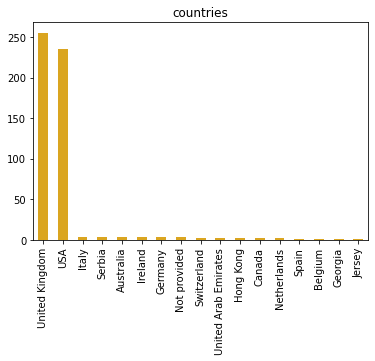

In [16]:
#looking at the participants 'demographic'
demographics = ['GEN_age_cat', 'GEN_age_corrected','GEN_bmi_cat', 'GEN_bmi_corrected', 'GEN_cat', 'GEN_country', 
                'GEN_dog', 'GEN_elevation', 'GEN_geo_loc_name','GEN_height_cm', 'GEN_sex', 'GEN_race', 'GEN_level_of_education', 
               'GEN_weight_kg', 'HEA_csection']
df_demo = df_metadata.loc[:, demographics]
df_demo.GEN_country.value_counts().plot(kind = 'bar', title = 'countries', color = 'goldenrod')

<AxesSubplot:title={'center':'weight categories of participants'}, ylabel='GEN_bmi_cat'>

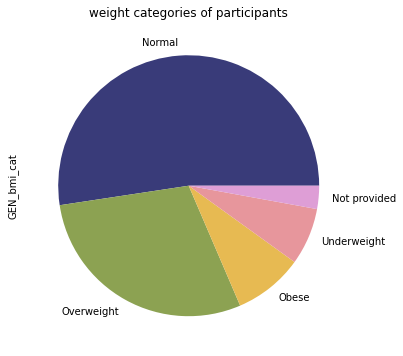

In [22]:
df_demo.GEN_bmi_cat.value_counts().plot(kind = 'pie', title = 'weight categories of participants',  
                                        figsize = [16, 6], colormap = 'tab20b')

<AxesSubplot:title={'center':'age categories of participants'}, ylabel='GEN_age_cat'>

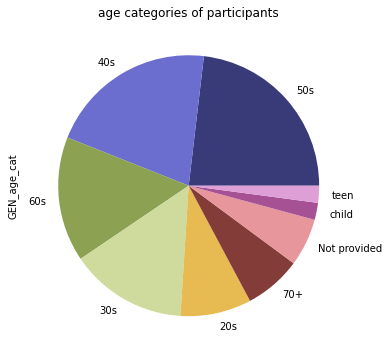

In [21]:
df_demo.GEN_age_cat.value_counts().plot(kind = 'pie', title = 'age categories of participants', figsize = [16, 6], colormap = 'tab20b')

<AxesSubplot:title={'center':'height in cm'}>

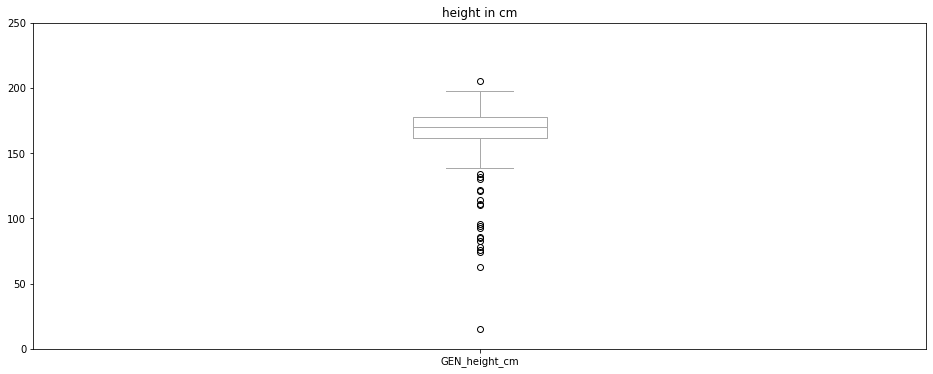

In [8]:
df_demo.GEN_height_cm.plot(kind = 'box', title = 'height in cm', color = 'darkgrey', ylim = [0, 250], figsize = [16, 6])

In [9]:
#or:
df_demo.GEN_height_cm.describe()

count     517.000000
mean      174.615087
std        98.850353
min        15.000000
25%       162.000000
50%       170.000000
75%       178.000000
max      1800.000000
Name: GEN_height_cm, dtype: float64

In [10]:
#making a list for all columns which are disease-related
diseases = ['HEA_acid_reflux', 'HEA_add_adhd', 'HEA_cancer', 'HEA_autoimmune', 'HEA_ibd', 'HEA_ibs',
           'HEA_cardiovascular_disease', 'HEA_chickenpox', 'HEA_diabetes',
            'HEA_liver_disease', 'HEA_lung_disease', 'HEA_mental_illness', 'HEA_migraine', 'HEA_sibo', 
            'HEA_cdiff', 'HEA_thyroid']
#separate list without chickenpox because the number is so high that it 'dominates' the plot (i guess it refers not to an 
#ongoing illness but to an infection in the past)
diseases_no_chicken = ['HEA_acid_reflux', 'HEA_add_adhd', 'HEA_cancer', 'HEA_autoimmune', 'HEA_ibd', 'HEA_ibs',
           'HEA_cardiovascular_disease', 'HEA_diabetes',
            'HEA_liver_disease', 'HEA_lung_disease', 'HEA_mental_illness', 'HEA_migraine', 'HEA_sibo', 
            'HEA_cdiff', 'HEA_thyroid']

In [11]:
#getting only the disease-related columns out of the whole metadata-dataframe
df_diseases = df_metadata.loc[:, diseases]

#same for the no chickenpox variant
df_diseases_no_chicken = df_metadata.loc[:, diseases_no_chicken]

In [12]:
#count the diseases with value 'True', put them into dataframe calling the sum-column 'sum'
#Then sort by sum-values in an ascending way
df_summary = pd.DataFrame(df_diseases.sum(), columns = ['sum'])
df_summary = df_summary.sort_values('sum')

#same for the no chickenpox variant
df_summary_no_chicken = pd.DataFrame(df_diseases_no_chicken.sum(), columns = ['sum'])
df_summary_no_chicken = df_summary_no_chicken.sort_values('sum')


<AxesSubplot:title={'center':'prevalence of diseases in participants'}>

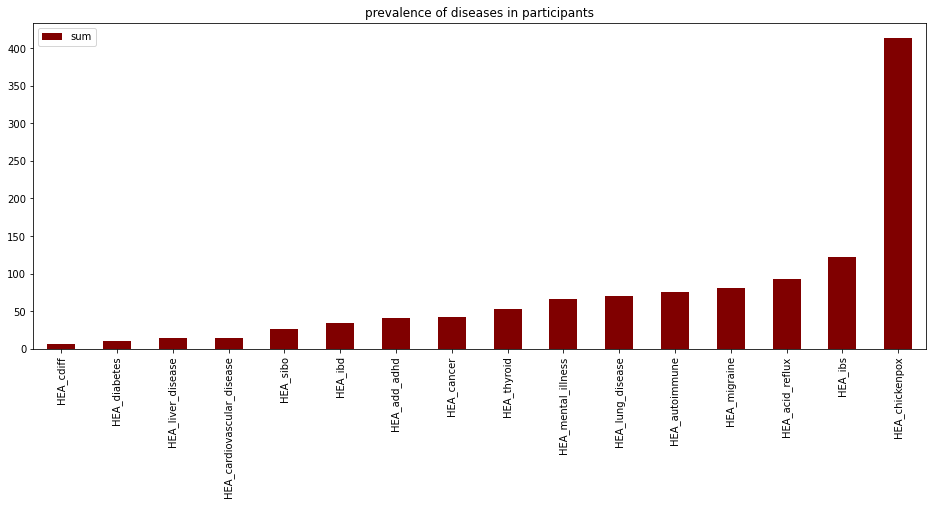

In [13]:
df_summary.plot(kind = 'bar', title = 'prevalence of diseases in participants', color = 'maroon', figsize = [16, 6]) 

<AxesSubplot:title={'center':'prevalence of diseases in participants without chickenpox'}>

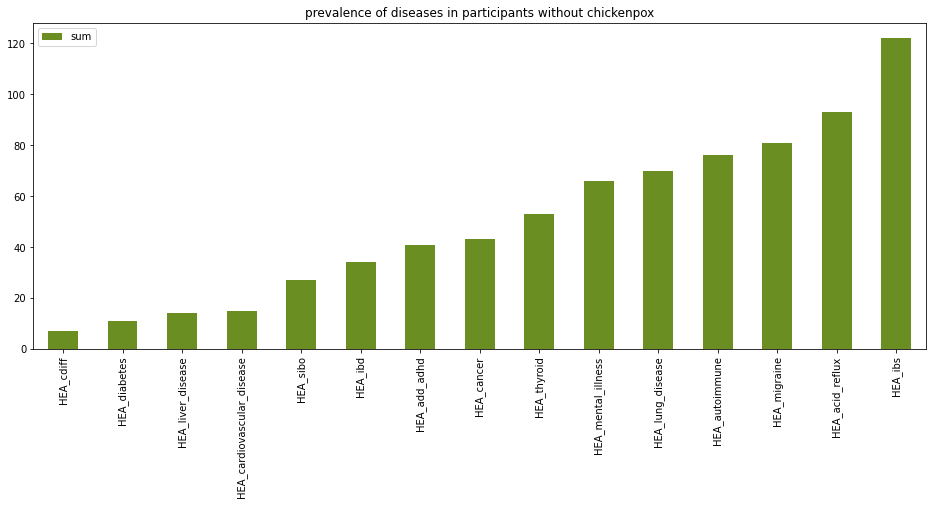

In [14]:
df_summary_no_chicken.plot(kind = 'bar', title = 'prevalence of diseases in participants without chickenpox', 
                           color = 'olivedrab', figsize = [16, 6]) 

<AxesSubplot:title={'center':'prevalence of allergies in participants'}>

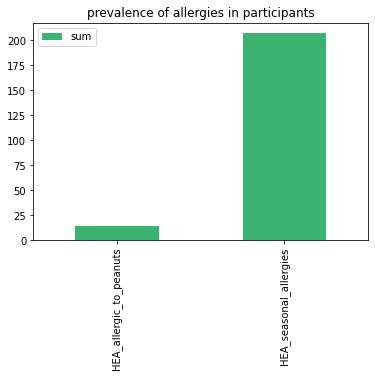

In [15]:
#same procedure as above for allergies
allergies = ['HEA_allergic_to_peanuts','HEA_seasonal_allergies' ] #creating a list of all allergie-columns
df_allergies = df_metadata.loc[:, allergies] #taking only allergie-columns out of metadata
df_allergies = pd.DataFrame(df_allergies.sum(), columns = ['sum'])# counting the allergies = True and put them in dataframe
df_allergies = df_allergies.sort_values('sum') #sorting them 
df_allergies.plot(kind = 'bar', title = 'prevalence of allergies in participants', color = 'mediumseagreen') 

<AxesSubplot:title={'center':'cancer treatment of participants'}>

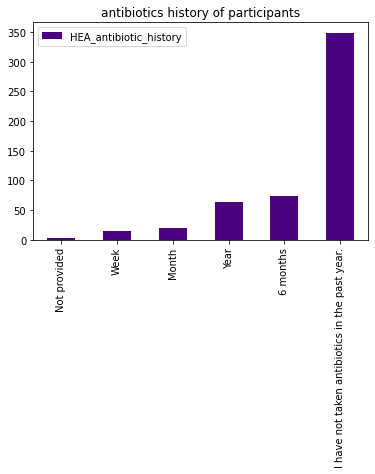

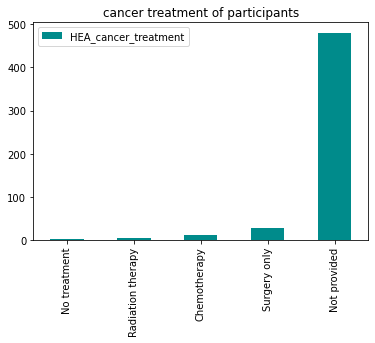

In [16]:
#treatment history has strings and not just boolean values
treatment_history = ['HEA_antibiotic_history', 'HEA_appendix_removed', 'HEA_cancer_treatment']
df_treatment_history = df_metadata.loc[:, treatment_history] #taking only treatment_history-columns out of metadata
#visualizing antibiotioc history
df_antibiotics = pd.DataFrame(df_treatment_history.HEA_antibiotic_history.value_counts())
df_antibiotics = df_antibiotics.sort_values('HEA_antibiotic_history')
df_antibiotics.plot(kind = 'bar', title = 'antibiotics history of participants', color = 'indigo') 
#visualizing cancer treatments
df_cancert = pd.DataFrame(df_treatment_history.HEA_cancer_treatment.value_counts())
df_cancert = df_cancert.sort_values('HEA_cancer_treatment')
df_cancert.plot(kind = 'bar', title = 'cancer treatment of participants', color = 'darkcyan')

<AxesSubplot:title={'center':'diseases grouped by sex 2'}, xlabel='GEN_sex'>

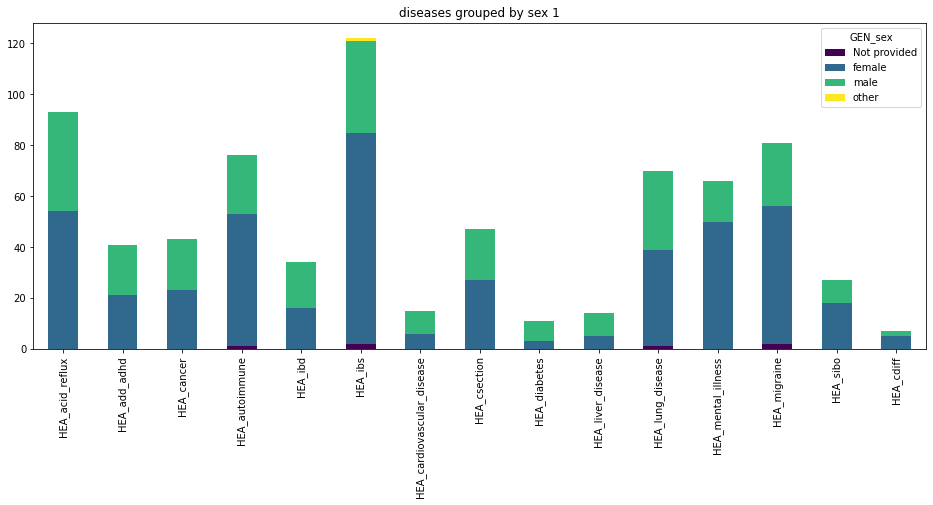

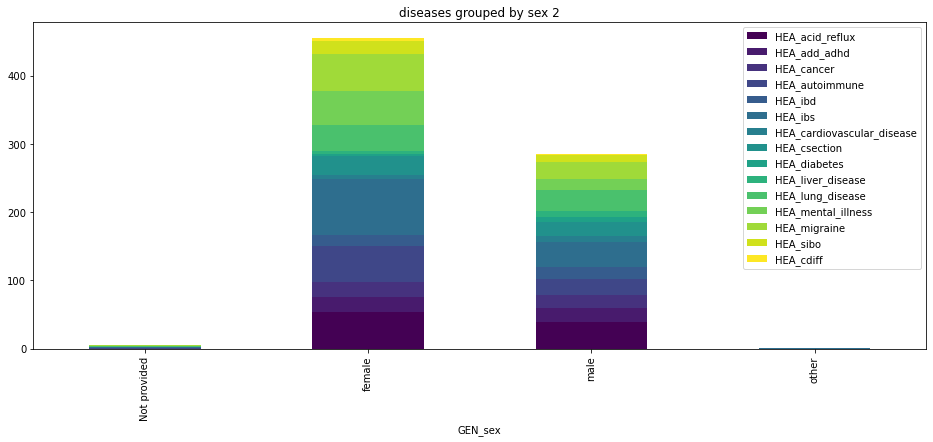

In [31]:
#here we group the patients based on their sex. we plot the diseases (without chickenpox)
group_diseases_s = ['HEA_acid_reflux', 'HEA_add_adhd', 'HEA_cancer', 'HEA_autoimmune', 'HEA_ibd', 'HEA_ibs',
           'HEA_cardiovascular_disease', 'HEA_csection', 'HEA_diabetes',
            'HEA_liver_disease', 'HEA_lung_disease', 'HEA_mental_illness', 'HEA_migraine', 'HEA_sibo', 
            'HEA_cdiff', 'GEN_sex']#, 'GEN_bmi_cat']
df_diseases_s = df_metadata.loc[:, group_diseases_s]
df_diseases_grouped_s =  df_diseases_s.groupby(['GEN_sex']).sum()
df_diseases_grouped_s.transpose().plot(kind = 'bar', stacked = True, figsize = [16, 6], title = 'diseases grouped by sex 1', colormap = 'viridis')
df_diseases_grouped_s.plot(kind = 'bar', stacked = True, figsize = [16, 6], title = 'diseases grouped by sex 2', colormap = 'viridis')



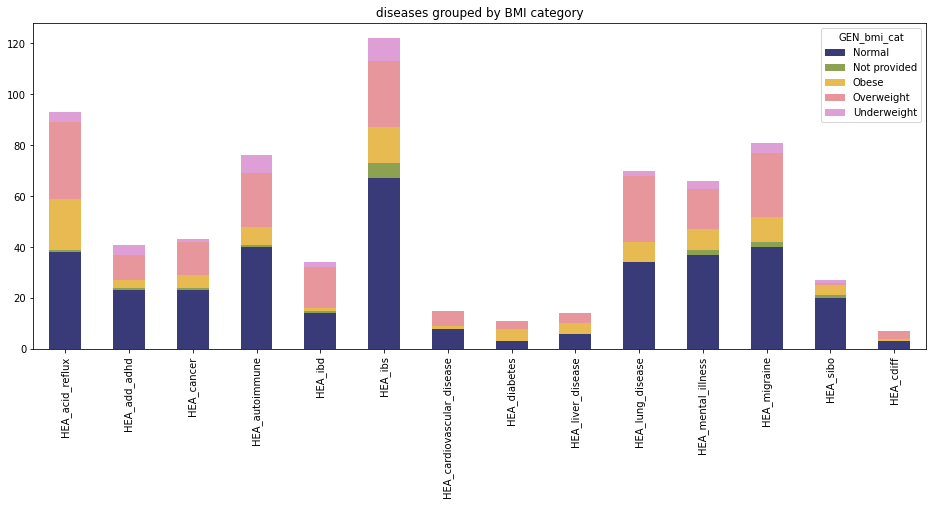

In [33]:
#here we group the patients based on their weight category. we plot the diseases (without chickenpox)
group_diseases_b = ['HEA_acid_reflux', 'HEA_add_adhd', 'HEA_cancer', 'HEA_autoimmune', 'HEA_ibd', 'HEA_ibs',
           'HEA_cardiovascular_disease','HEA_diabetes',
            'HEA_liver_disease', 'HEA_lung_disease', 'HEA_mental_illness', 'HEA_migraine', 'HEA_sibo', 
            'HEA_cdiff', 'GEN_bmi_cat']
df_diseases_b = df_metadata.loc[:, group_diseases_b]
df_diseases_grouped_b =  df_diseases_b.groupby(['GEN_bmi_cat']).sum()
df_diseases_grouped_b.transpose().plot(kind = 'bar', stacked = True, figsize = [16, 6], 
                                       title = 'diseases grouped by BMI category', colormap = 'tab20b')
plt.savefig(f'{exp_dir}/diseases_bmi_cat', bbox_inches='tight')
#df_diseases_grouped_b.plot(kind = 'bar', stacked = True, figsize = [16, 6], title = 'diseases grouped by BMI categorie 2', colormap = 'viridis')

<AxesSubplot:title={'center':'diseases grouped by sex'}>

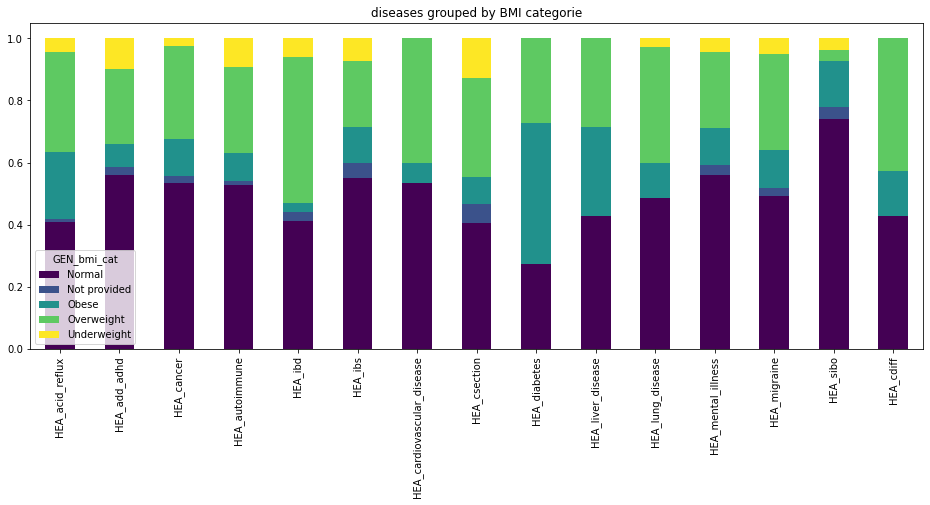

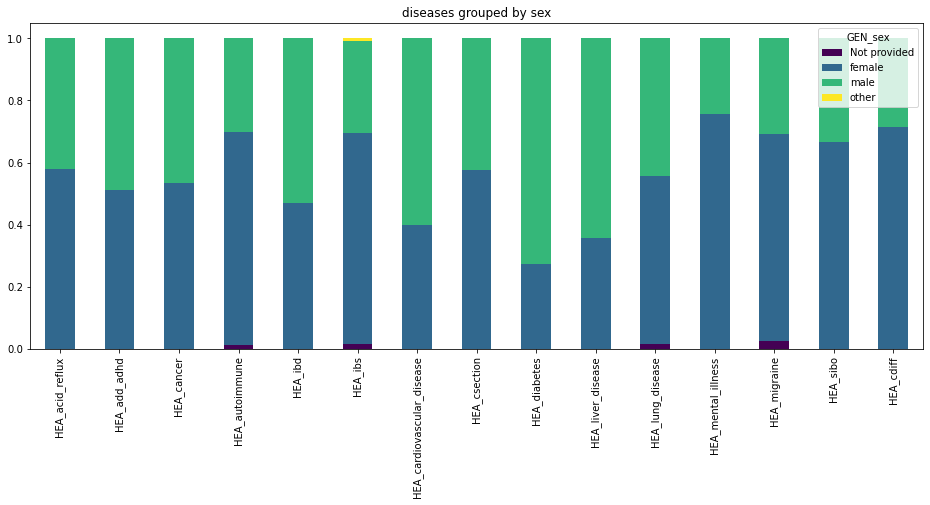

In [32]:
#same in percentage
df_diseases_grouped_b_perc = df_diseases_grouped_b/df_diseases_grouped_b.sum()
df_diseases_grouped_s_perc = df_diseases_grouped_s/df_diseases_grouped_s.sum()

df_diseases_grouped_b_perc.transpose().plot(kind = 'bar', stacked = True, figsize = [16, 6], 
                                       title = 'diseases grouped by BMI categorie', colormap = 'viridis')
df_diseases_grouped_s_perc.transpose().plot(kind = 'bar', stacked = True, figsize = [16, 6], 
                                       title = 'diseases grouped by sex', colormap = 'viridis')

1.b) Is there existing scientific evidence that some conditions in your cohort could be linked to the gut
microbiome?